морозов вариант 14

a=4
cigma^2=9
n=90
q=1,35
k=5
правило скотта
зр 
Треугольное на отрезке (0, 5) и модой, равной 3

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd

    1. Смоделировать выборку из п независимых наблюдений над случайной величиной X, имеющей нормальный закон распределения с параметрами (a,2).
       

In [42]:
def get_sample(ma,sigma,n):
    return norm.rvs(loc=ma, scale=sigma, size=n)



a = 4 
sigma = 3# 
n_points = 90 
q = 1.35
k=5
left = 0
right = 5
mode = 3
my_c = (mode - left)/(right-left)
my_loc = left
my_scale = right-left

X = get_sample(a,sigma,n_points)
print(X)

[ 4.83089835  3.64406105 -1.67253883  5.83213625  9.92811136  3.62227856
  2.51123001  3.07441781  4.50448455  5.88206704  3.20620165  4.41830538
  3.82486325 -3.08354195  2.54936973  4.8700286  -2.01918558  6.8857367
  4.04772741  2.26549994  1.79141059  2.15649165  4.51861865 -0.46082074
 -3.38250393  8.22158983  5.258374    2.58213275  2.67764699  5.58112176
  5.62781849  4.72908501  5.30539585 -1.46790998  3.12511785  9.26783062
  5.71476928  5.2342184   5.36201816  6.34761298  2.07777165  1.41788779
  3.20938627  4.00661021  6.69372625  0.09008217  0.76943591  9.710903
  2.54551895  0.03737398  7.2735034   0.40213324  1.23069026  7.14880783
  5.88282922  3.2152269   0.7997569   2.98375564  1.60695348  3.87888572
  3.29463999 -3.69313722  2.05450417  7.00313207  4.95146652 11.78241015
  5.12785136  3.56099782  4.04765758  1.03298677 -0.51092688  7.04941325
  3.96882484  3.96098256  5.49843245  4.88311521  4.33031734 10.33025478
  4.22510803  5.59082196  1.22530537  7.69525637  2.71

Сгруппировать данные в интервалы и найти интервальный ряд абсолютных частот. Число интервалов группировки выбрать в соответствии с правилом, указанном в Вашем варианте.( Правило скотта  k = 3.5 * σ * n^(-1/3).) 
Вычислить средствами Python сумму абсолютных частот. Построить диаграмму абсолютных частот

In [43]:
def get_intervals(sample,n):
    n_intervals =1 + 3.3 * math.log10(n)
    h = (sample.max()-sample.min())/n_intervals
    print(f"Количество интервалов: {n_intervals}\nДлина интервала: {h}\nМаксимальный: {sample.max()}\nМинимальный элемент: {sample.min()} ")
    intervals = []
    for i in range(0, int(n_intervals)):
        print(f'{i+1} interval: {sample.min()+i*h} - {sample.min()+(i+1)*h}')
        intervals.append(sample.min()+i*h)
    intervals.append(sample.min()+n_intervals*h)
    return intervals,h,n_intervals
intervals,h,n_intervals=get_intervals(X,n_points)

Количество интервалов: 7.449000281149772
Длина интервала: 2.077533465272156
Максимальный: 11.782410145633794
Минимальный элемент: -3.6931372212765563 
1 interval: -3.6931372212765563 - -1.6156037560044
2 interval: -1.6156037560044 - 0.4619297092677561
3 interval: 0.4619297092677561 - 2.5394631745399128
4 interval: 2.5394631745399128 - 4.6169966398120685
5 interval: 4.6169966398120685 - 6.694530105084224
6 interval: 6.694530105084224 - 8.772063570356382
7 interval: 8.772063570356382 - 10.849597035628538


Сгруппировать данные в интервалы и найти интервальный ряд Абсолютных частот. Вычислить средствами Python сумму относительных частот. Построить диаграмму относительных частот.

1 interval: 5
2 interval: 6
3 interval: 15
4 interval: 28
5 interval: 22
6 interval: 8
7 interval: 6

Сумма частот - 90


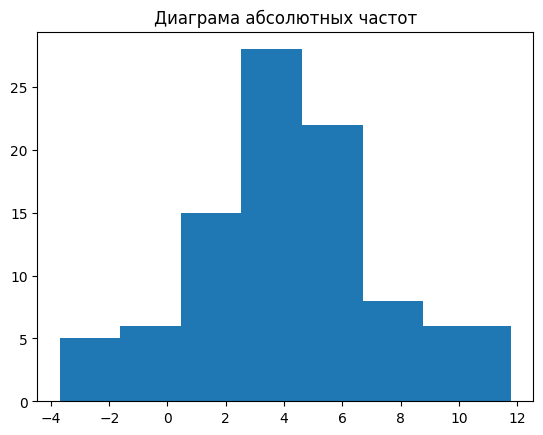

In [44]:
def absolute_frequency(X,intervals):
    frequency = []
    arraySort = list(X)
    arraySort.sort()
    for i in range(0, len(intervals)-1):
        frequency.append(0)
        for j in arraySort:
            if j >= intervals[i] and j <= intervals[i+1]:
                frequency[i] += 1
    for i in range(0, len(frequency)):
        print(f'{i+1} interval: {frequency[i]}')
    frequency = np.array(frequency)

    print(f'\nСумма частот - {(frequency).sum()}')
    plt.title("Диаграма абсолютных частот")
    plt.stairs(frequency, intervals, fill=True)
    return frequency

frequency=absolute_frequency(X,intervals)

Построить гистограмму относительных частот и теоретическую кривую распределения случайной величины X (причем гистограмму и кривую распределения разместить на одном рисунке).

1 interval: 0.026741112229582205
2 interval: 0.03208933467549865
3 interval: 0.08022333668874662
4 interval: 0.14975022848566036
5 interval: 0.1176608938101617
6 interval: 0.04278577956733153
7 interval: 0.03208933467549865


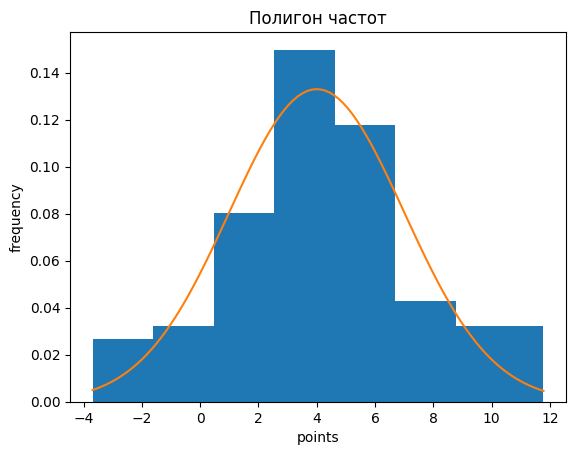

Сумма площадей под графиком:  1.0


In [45]:
def relative_frequency_and_theoretical(X,frequency,h,n_points):
    my_pdf = frequency/(h*n_points)
    for i in range(0, len(my_pdf)):
        print(f'{i+1} interval: {my_pdf[i]}')
    plt.stairs(my_pdf, intervals, fill=True)


    x = np.linspace(X.min(), X.max(), 100)
    plt.plot(x, sts.norm.pdf(x, a, sigma))

    plt.title('Полигон частот')
    plt.xlabel('points')
    plt.ylabel('frequency')
    plt.show()
    proof = 0 
        
    for i in frequency/n_points/h:
        proof+=i*h
    print("Сумма площадей под графиком: ", proof)
relative_frequency_and_theoretical(X,frequency,h,n_points)

Построить гистограмму абсолютных и график теоретической частоты распределения случайной величины X (причем и гистограмму, и график теоретической частоты разместить на одном рисунке).

1 interval: 0.026741112229582205
2 interval: 0.03208933467549865
3 interval: 0.08022333668874662
4 interval: 0.14975022848566036
5 interval: 0.1176608938101617
6 interval: 0.04278577956733153
7 interval: 0.03208933467549865


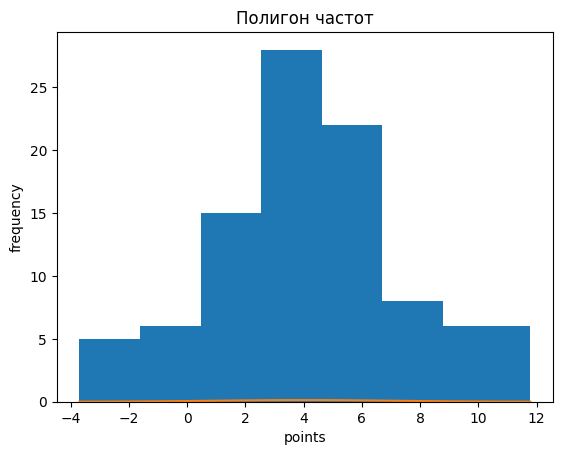

In [46]:
def absolute_frequency_and_theoretical(X,frequency,h,n_points):

    my_pdf = frequency/(h*n_points)
    for i in range(0, len(my_pdf)):
        print(f'{i+1} interval: {my_pdf[i]}')
    plt.stairs(frequency, intervals, fill=True)


    x = np.linspace(X.min(), X.max(), 100)
    plt.plot(x, sts.norm.pdf(x, a, sigma))

    plt.title('Полигон частот')
    plt.xlabel('points')
    plt.ylabel('frequency')
    plt.show()

absolute_frequency_and_theoretical(X,frequency,h,n_points)


Построить по выборке график эмпирической функции распределения случайной величины X (кумуляту относительных частот) и график теоретической функции распределения  случайной величины X, разместив их на одном рисунке

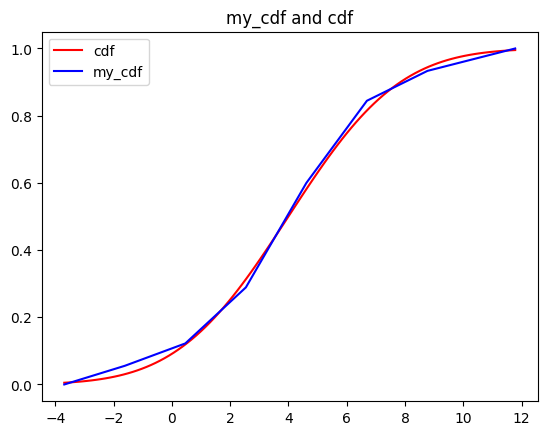

In [47]:
def emperic_and_theorethical(X,frequency,n_points):
    arrayGraph = []
    tmp1= frequency/n_points
    for i in range(0, len(tmp1)):
        arrayGraph.append(0)
        for j in range (0, i):
            arrayGraph[i]+=tmp1[j]
    cdfY = []
    for i in arrayGraph:
        cdfY.append(i)
    cdfY.append(1)
    cdfX = []
    for i in intervals:
        cdfX.append(i)
    x = np.linspace(X.min(), X.max(), 100)
    plt.plot(x, sts.norm.cdf(x, a, sigma), color="red")

    plt.plot(cdfX, cdfY, color="blue")
    plt.legend(['cdf', 'my_cdf'])
    plt.title("my_cdf and cdf")
    plt.show()

emperic_and_theorethical(X,frequency,n_points)

Построить по выборке бокс-плот распределения (“ящик с усами”) и дать ему статистическую интерпретацию. В частности, ответить на вопрос: Каково теоретически ожидаемое число выбросов для выборки данного объема?

1.35
Вероятность по таблице 0.9198
Вероятность по lib 0.8229840171251961
Статистическая 0.8111111111111111


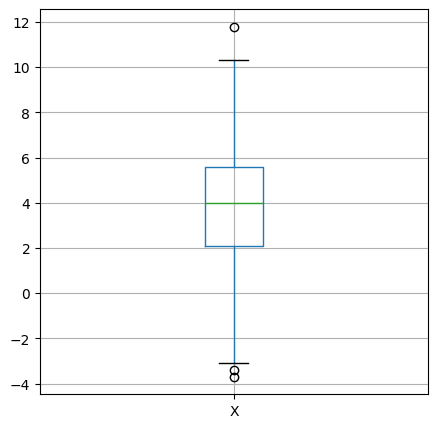

In [48]:
def box_plot(X,q):
    df = pd.DataFrame(data=X,columns=['X'])
    df.boxplot(figsize = (5, 5))
    df.quantile([0.25,0.5,0.75])
    print(q)
    print(f"Вероятность по таблице {0.4599*2}")
    print(f"Вероятность по lib {sts.norm().cdf(q)-sts.norm().cdf(-q)}")

    prob = 0
    for i in X:
        if i>mode -(q*sigma) and i<mode +(q*sigma):
            prob+=1
    prob/=n_points
    print(f"Статистическая {prob}")

box_plot(X,q)

Проанализировав результаты п.1 и 2., ответить на следующие вопросы:

Какова Ваша оценка вероятности попадания значений случайной  величины X в k-ый интервал полученной группировки?

Какой из полученных в п.2 графиков содержит геометрическую интерпретацию этой оценки, покажите ее на графике.

Какой из полученных в п.2 графиков содержит геометрическую интерпретацию вероятности попадания значений случайной  величины X в k-ый интервал, покажите ее на графике.

Какова Ваша оценка значения интегральной функции распределения в правой границе k-ого интервала полученной группировки? А чему равно точное значение интегральной функции распределения в правой границе k-ого интервала?



Используя таблицу значений функции Лапласа, найти вероятность 
(вычисления вероятности сделать “вручную” )
P(|X-MX|<q)                                            (*)
     3.1. Найти вероятность (*), используя встроенные функции Python.


In [49]:
def px_mx(q):
    print(f"Вероятность P(|X-MX|<{q}) равна { norm.cdf(q, loc=a, scale=sigma) - norm.cdf(-q, loc=a, scale=sigma):.4f}")

px_mx(q)

Вероятность P(|X-MX|<1.35) равна 0.1513


. Найдите по выборке оценку вероятности (*), т.е. относительную частоту события 
{|X-MX|<q}.


In [50]:
def x_mx(X,q,n_points):
    count = np.sum(np.abs(X - a) < q)
    probability = count / n_points
    print("Оценка вероятности:", probability)

x_mx(X,q,n_points)

Оценка вероятности: 0.3888888888888889


Увеличьте объем выборки п в 50 раз и повторите п. 3.2. Объясните, как увеличение объема выборки повлияло на точность  оценки вероятности (*).

In [51]:
x_mx(X,q,n_points*50)

Оценка вероятности: 0.0077777777777777776


Вычислить по выборке точечные оценки параметров распределения случайной величины X: математического ожидания, медианы, дисперсии, стандартного отклонения, коэффициента ассиметрии, эксцесса двумя способами

первый способ –непосредственное применение формул для вычисления   точечных оценок;
второй способ – применение встроенных функций Python, например,  describe, std, mean  и т.д.


In [52]:
def ma_med_sigma_ass_exc(sample):
     
    X= sample.sum()/len(sample)
    print(f'Первый эмпирический момент: {X}')
    s2 = 0
    for i in sample:
        s2 += (i-X)**2
    s2 = s2/len(sample)
    print(f'Эмпирическая дисперсия: {s2}')
    print(f'Стандартное отклонение: {math.sqrt(s2)}')
    print(f'S^2: {(s2)*len(sample)/(len(sample)-1)}')

    x4 = 0
    s3 = 0
    s4 = 0
    for i in sample:
        x4 += math.pow(i, 4)
        s3 += math.pow((i-X), 3)
        s4 += math.pow((i-X), 4)
    x4 /= len(sample)
    s3 /= len(sample)
    s4 /= len(sample)
    print(f'Коэффициент ассимметрии: {s3/math.pow(math.sqrt(s2), 3)}')
    print(f'Коэффициент эксцесса: {s4/math.pow(s2, 2)-3}')

ma_med_sigma_ass_exc(X)

Первый эмпирический момент: 3.8597951612360255
Эмпирическая дисперсия: 9.069621006713987
Стандартное отклонение: 3.0115811472902383
S^2: 9.17152686072201
Коэффициент ассимметрии: -0.08402436556754561
Коэффициент эксцесса: 0.3149358753825964


Увеличьте объем выборки п в 50 раз и повторите п. 4. 2.

In [53]:
ma_med_sigma_ass_exc(get_sample(a,sigma,n_points*50))

Первый эмпирический момент: 4.052408419515635
Эмпирическая дисперсия: 8.91158901182865
Стандартное отклонение: 2.985228468949847
S^2: 8.913569805118676
Коэффициент ассимметрии: -0.02236762040443946
Коэффициент эксцесса: -0.01569518623589694


Проанализировав результаты п.4, ответить на следующие вопросы:
Чему равны коэффициенты асимметрии и эксцесса распределения случайной величины X? 
 Объясните, как увеличение объема выборки повлияло на точность  оценок параметров распределения. 
Какое свойство точечных оценок параметров распределения случайной величины X объясняет такое поведение оценок параметров распределения в ответ на рост объема выборки?

ЧАСТЬ 2

1.Смоделировать выборку из п независимых наблюдений над случайной величиной Y, имеющей закон распределения, указаный в Вашем варианте. 

In [54]:

def triangular_inv(u, a, b, mode):
    if u <= 0.5:
        return a + np.sqrt(u*(b-a)*(mode-a))
    else:
        return b - np.sqrt((1-u)*(b-a)*(b-mode))

def generate_triangular_sample(p, a, b, mode):
    u = np.random.uniform(size=p)
    y = np.array([triangular_inv(ui, a, b, mode) for ui in u])
    return y

# Пример использования:
n_points=90

Y = generate_triangular_sample(n_points, 0, 5, 3)
print(Y)
n_intervals =1 + 3.3 * math.log10(n_points)
h = (Y.max()-Y.min())/n_intervals


[1.24187461 3.11038751 3.53056511 1.30443563 3.73963218 2.6003134
 2.52176291 1.31006419 1.8037251  3.74807004 3.59878726 3.45676107
 2.83236    3.25816307 3.64449869 2.03908578 1.90604283 2.5335854
 3.13695657 3.69764032 4.14560122 3.60656537 1.37994822 1.02285011
 2.67233103 2.37351404 2.86118069 3.40447399 2.61421099 3.51286958
 3.06517567 2.03714765 2.54607506 2.04244346 2.51643769 3.55714269
 3.54521581 2.07461605 3.60292289 2.42067654 1.42745941 3.05772295
 3.23312656 1.05031752 3.08369809 1.41806245 2.37654359 0.99269721
 3.67368456 3.69491948 3.71870991 1.99627832 3.00139981 2.19353852
 3.33372896 1.56708386 4.00827076 3.34772478 2.78000163 1.461114
 1.76375468 3.86799856 2.05471864 1.20081156 2.86856237 0.49815721
 3.25764699 2.0540412  3.17359716 3.17665842 3.21953194 2.01615439
 2.86740047 1.24935533 4.47583784 3.33188275 2.5672958  2.2070889
 1.20639985 2.37757204 1.66087704 0.48433978 2.61126291 3.48651696
 2.97887559 1.74829105 3.84617034 4.11752395 1.42800053 3.46009612]

Для визуализации данных построить гистограмму относительных частот и теоретическую кривую распределения случайной величины Y (причем гистограмму и кривую распределения разместить на одном рисунке).

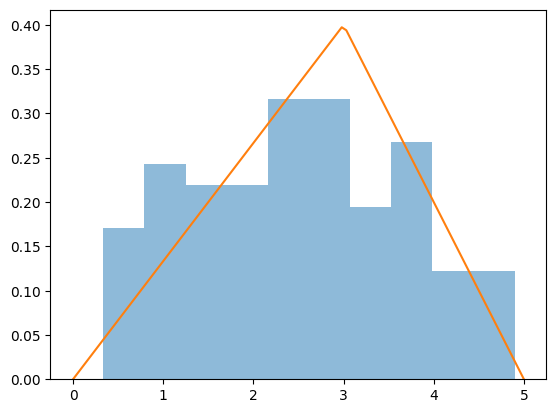

In [55]:
n = 90
a = 0
b = 5
sample = np.random.triangular(a, mode, b, size=n)

mode = 3


# Рассчитываем теоретическую кривую распределения
x = np.linspace(a, b, 100)
y = np.zeros_like(x)
for i in range(len(x)):
    if x[i] <= mode:
        y[i] = 2*(x[i]-a)/((b-a)*(mode-a))
    else:
        y[i] = 2*(b-x[i])/((b-a)*(b-mode))

# Строим гистограмму и теоретическую кривую распределения на одном графике
plt.hist(sample, bins=10, density=True, alpha=0.5)
plt.plot(x, y)



Построить по выборке бокс-плот распределения (“ящик с усами”) случайной величины Y и дать ему статистическую интерпретацию. В частности, ответить на вопрос: 
Каково теоретически ожидаемое число выбросов для выборки данного объема?


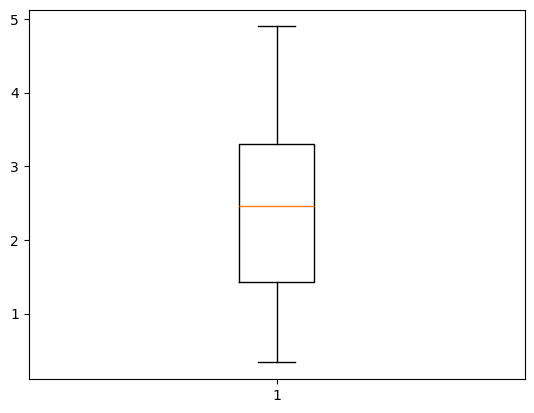

In [56]:
# Строим бокс-плот распределения
plt.figure()
plt.boxplot(sample)

plt.show()

Проанализировав результаты п.1 и 2, ответить на следующие вопросы:
Какова Ваша оценка вероятности попадания значений случайной  величины Y в k-ый интервал полученной группировки? 
Какова вероятность попадания значений случайной  величины Y в k-ый интервал полученной группировки? 

Используя теоретические знания о функции распределения случайной величины, найти  вероятность (вычисления вероятности сделать “вручную” ) 
P(|Y -M Y |< q)                                            (*)


In [57]:
# Рассчет среднего M(Y)
mean_Y = np.mean(sample)

# Рассчет вероятности P(|Y - M(Y)| < q)
prob1 = np.sum(np.abs(sample - mean_Y) < q) / n
print(f'Вероятность P(|Y - M(Y)| < {q}) на питоне: {prob1}')


Вероятность P(|Y - M(Y)| < 1.35) на питоне: 0.6777777777777778


Найти вероятность (*), используя встроенные функции Python

Найдите по выборке оценку вероятности (*), т.е. относительную частоту события 
{ Y -M Y |<q}.


In [58]:
# Рассчет вероятности |Y - M(Y)| < q
prob2 = np.sum(np.abs(sample - mean_Y) < q) / n
print(f'Вероятность |Y - M(Y)| < {q} на питоне: {prob2}')

Вероятность |Y - M(Y)| < 1.35 на питоне: 0.6777777777777778


Увеличьте объем выборки п в 50 раз и повторите п. 2.2. Объясните, как увеличение объема выборки повлияло на точность  оценки вероятности (*).


In [69]:
n=n*50
sample = np.random.triangular(a, mode, b, size=n)
# Рассчет среднего M(Y)
mean_Y = np.mean(sample)

# Рассчет вероятности P(|Y - M(Y)| < q)
prob1 = np.sum(np.abs(sample - mean_Y) < q) / n
print(f'Вероятность P(|Y - M(Y)| < {q}) на питоне: {prob1}')


Вероятность P(|Y - M(Y)| < 1.35) на питоне: 0.7868888888888889


Вычислить по выборке точечные оценки параметров распределения случайной величины X: математического ожидания, медианы, дисперсии, стандартного отклонения, коэффициента ассиметрии, эксцесса, применяя встроенных функций Python, например,  describe, std, mean  и т.д.


In [70]:
ma_med_sigma_ass_exc(sample)

Первый эмпирический момент: 2.6911097827639963
Эмпирическая дисперсия: 1.0653173637753963
Стандартное отклонение: 1.0321421238256854
S^2: 1.0655541535873045
Коэффициент ассимметрии: -0.19474336976399417
Коэффициент эксцесса: -0.6102532464832064


Чему равны коэффициенты ассиметрии и эксцесса распределения случайной величины Y?  Объясните, как увеличение объема выборки повлияло на точность  оценок параметров распределения